In [41]:
from decimal import Decimal
import random
import matplotlib.pyplot as plt
from math import (
    factorial
)
import numpy

## Problem 1
### (a)

In [42]:
def get_next_pos(x, N):
    '''
    Given x_n returns x_{n+1}
    '''
    return (x + random.choice([-1, 0, 1])) % N

def random_walk(N, start_pos, t):
    '''
    Starts the system at start_pos (X_0) and performs a random walk of length t
    Returns a list of positions of X
    '''
    pos_list = []
    pos_list.append(start_pos)
    x = start_pos
    for i in range(t):
        x = get_next_pos(x, N)
        pos_list.append(x)
    return pos_list

### (b)

Text(0, 0.5, '$X_n$')

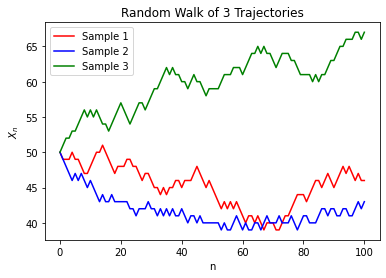

In [43]:

N = 100
start_pos = 50
t = 100

sample1 = random_walk(N, start_pos, t)
sample2 = random_walk(N, start_pos, t)
sample3 = random_walk(N, start_pos, t)

plt.plot(range(t + 1), sample1, color = "red", label = "Sample 1")
plt.plot(range(t + 1), sample2, color = "blue", label = "Sample 2")
plt.plot(range(t + 1), sample3, color = "green", label = "Sample 3")
plt.legend()
plt.title("Random Walk of 3 Trajectories")
plt.xlabel("n")
plt.ylabel(r"$X_n$")

### (c)
We can compute $\langle dX_n \rangle = \frac{1}{3} \times -1 + \frac{1}{3} \times 0 + \frac{1}{3} \times 1 = 0$.
We can compute $\langle {dX_n}^2 \rangle = \frac{1}{3} \times (-1)^2 + \frac{1}{3} \times 0 + \frac{1}{3} \times 1^2 = \frac{2}{3}$

### (d)
Using the recursive definition of $X_n$, we can say that $X_T = X_0 + \sum_{i = 0}^{T-1} dX_{i}$. Thus $D = X_T - X_0 = \sum_{i = 0}^{T-1} dX_{i}$. We start with $\langle D \rangle = \langle \sum_{i = 0}^{T-1} dX_{i} \rangle$ and use linearity of mean to obtain $\sum_{i=0}^{T-1} \langle dX_{i} \rangle$ and since each $dX_{i}$ is independent we obtain $T \langle dX_{i} \rangle = 0$.

For $\langle D^2 \rangle$, we have $\langle (\sum_{i = 0}^{t-1} dX_{i})^2 \rangle = \langle \sum_{i} {dX_i}^2 + \sum_{i \neq  j} dX_i dX_j \rangle$. Using linearity of expectation and the fact that when $i \neq j$ that $dX_i, dX_j$ are independent we obtain $\sum_{i=0}^{T-1} \langle {dX_i}^2 \rangle + \sum_{i \neq j}\langle dX_i \rangle \langle dX_j \rangle$ which we can evalate to $\frac{2}{3}T$

### (e)

Sample estimate of mean of D: -0.81
Sample estimate of variance of D: 59.09087


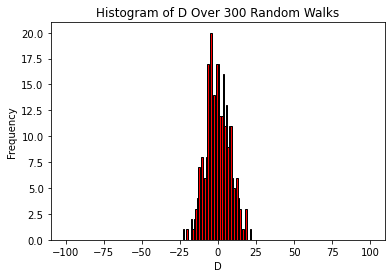

In [44]:
d_samples = []
for i in range(300):
    last_pos = random_walk(N, start_pos, t)[-1]
    d_samples.append(last_pos - start_pos)

plt.hist(d_samples, bins = range(-t, t + 1), color = "red", edgecolor = "black")
plt.title("Histogram of D Over 300 Random Walks")
plt.xlabel("D")
plt.ylabel("Frequency")

d_bar = sum(d_samples) / len(d_samples)
print(f"Sample estimate of mean of D: {round(d_bar, 6)}")
var_bar = 0
for sample in d_samples:
    var_bar += ((sample - d_bar) ** 2)
var_bar /= (len(d_samples) - 1)
print(f"Sample estimate of variance of D: {round(var_bar, 6)}")

### (f)

Text(0, 0.5, 'Probability')

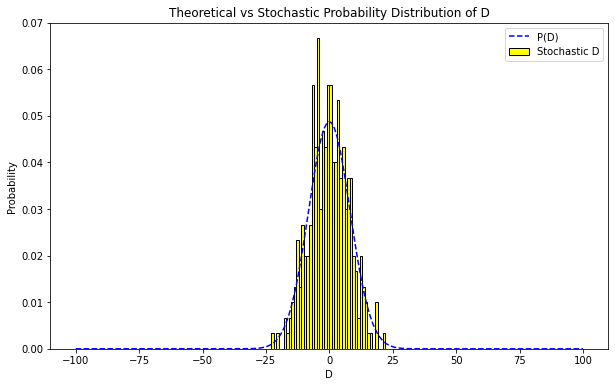

In [45]:
def generate_pd(t):
    '''
    Generate the probability of values of D
    '''
    p_d = []
    d_vals = range(-t, t + 1)
    numerator = Decimal(factorial(t)) / Decimal(3 ** t)
    factorial_memo = {}
    for d in d_vals:
        prob = 0
        # k0 represents when dX = 1
        for k0 in range(max(0, d), t + 1):
            # We want k0 + (-1)k1 = d
            # Rearranging this gives us
            k1 = k0 - d
            # Need to make sure we have enough k1
            if t - k0 < k1:
                break
            k2 = t - k0 - k1
            # Calculate trinomial probability without overflow
            if factorial_memo.get(k0) is not None:
                k0_factorial = factorial_memo.get(k0)
            else:
                k0_factorial = Decimal(factorial(k0))
                factorial_memo[k0] = k0_factorial

            if factorial_memo.get(k1) is not None:
                k1_factorial = factorial_memo.get(k1)
            else:
                k1_factorial = Decimal(factorial(k1))
                factorial_memo[k1] = k1_factorial

            if factorial_memo.get(k2) is not None:
                k2_factorial = factorial_memo.get(k2)
            else:
                k2_factorial = Decimal(factorial(k2))
                factorial_memo[k2] = k2_factorial

            curr_prob = numerator / (k0_factorial * k1_factorial * k2_factorial)
            prob += curr_prob
        p_d.append(prob)
    return p_d

p_d = generate_pd(t)
plt.figure(figsize=(10, 6))
plt.plot(range(-t, t+1), p_d, color = "blue", ls = "--", label = "P(D)")
weights = numpy.divide(numpy.ones_like(d_samples), 300)
plt.hist(d_samples, weights = weights, bins = range(-t, t+1), edgecolor = "black", color = "yellow", label = "Stochastic D")
plt.legend()
plt.title("Theoretical vs Stochastic Probability Distribution of D")
plt.xlabel("D")
plt.ylabel("Probability")

###  (g)

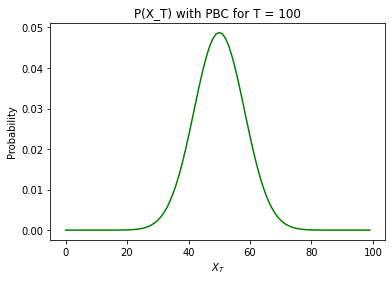

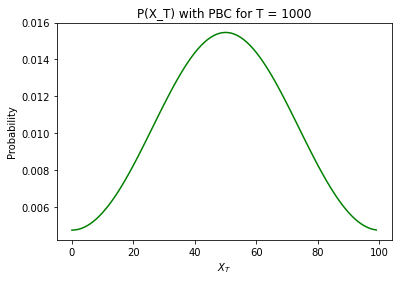

In [46]:
for t in [100, 1000]:
    p_delta = generate_pd(t)
    p_d_pbc = [0 for _ in range(N)]
    for j in range(len(p_delta)):
        delta = j - t
        p_d_pbc[(50 + delta) % N] += p_delta[j]
    plt.plot(range(N), p_d_pbc, color = "green")
    plt.title(r"P(X_T) with PBC for T = " + f"{t}")
    plt.ylabel("Probability")
    plt.xlabel(r"$X_T$")
    plt.show()


For this problem, we have to now consider PBC. In the above code I calculate $\delta = \sum_{i=0}^{t-1} dX_{i}$ and then find $X_T  = (50 + \delta) \% n$ for $T = 100, 1000$. I don't do higher values because then the run time is too high. We can realize that the width of the curve is roughly the same as the width of the curve of D because when as $\delta$ increases or decreases away from 0 enough that it starts to wrap around, the effect is marginal. I choose to define the width as such as $2\sigma_D$. Thus if we want our width to span the entire system we want $2\sigma_D = 100$. Knowing that $\sigma_D = \sqrt{\frac{2T}{3}}$ from (d), we can evaluate to obtain that $T \approx 3750$.